# install libary

In [2]:
!pip3 install numpy
!pip3 install matplotlib
!pip3 install pandas
!pip3 install -U scikit-learn


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\Yosef\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\Yosef\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\Yosef\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\Yosef\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import  pandas as pd
from natsort import natsorted
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler , RobustScaler
from sklearn.utils import resample 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import  GaussianNB

# cheking the precision and recall after data oversampling
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import mean_absolute_error,r2_score ,mean_squared_error


# read data set 

In [4]:
ds = pd.read_csv('insurance.csv')
# ds = pd.read_csv('insurance') take care

In [5]:
ds.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0.0,yes,southwest,16884.92400
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,33.000,3.0,no,southeast,4449.46200
3,33,male,22.705,0.0,no,northwest,21984.47061
4,32,male,28.880,0.0,no,northwest,3866.85520


In [6]:
ds.describe()

,age,bmi,children,charges
count,1338.000000,1337.000000,1334.000000,1335.000000
mean,39.207773,30.662098,1.094453,13226.516482
std,14.053329,6.100284,1.205793,12087.359104
min,18.000000,15.960000,0.000000,3.000000
25%,26.250000,26.290000,0.000000,4729.002375
50%,39.000000,30.400000,1.000000,9361.326800
75%,51.000000,34.700000,2.000000,16516.743675
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1332 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1334 non-null   float64
 4   smoker    1334 non-null   object 
 5   region    1334 non-null   object 
 6   charges   1335 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [8]:
ds.drop("bmi", inplace=True, axis=1)
#inplace=True : mean drob from the actul data not copy 
#axis=1 i will drob from columns 
#axis=0 i will drob from rows  
ds.columns.to_list()

['age', 'sex', 'children', 'smoker', 'region', 'charges']

In [9]:
ds.columns.drop("age")
# drob from the copy of data

Index(['sex', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
ds.columns

Index(['age', 'sex', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [11]:
ds.shape


(1338, 6)

In [12]:
ds.iloc [4,:]

age                32
sex              male
children          0.0
smoker             no
region      northwest
charges     3866.8552
Name: 4, dtype: object

In [13]:
ds.iloc [:,4]

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

In [14]:
ds.iloc[:,:]

,age,sex,children,smoker,region,charges
0,19,female,0.0,yes,southwest,16884.92400
1,18,male,1.0,no,southeast,1725.55230
2,28,male,3.0,no,southeast,4449.46200
3,33,male,0.0,no,northwest,21984.47061
4,32,male,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...
1333,50,male,3.0,no,northwest,10600.54830
1334,18,female,0.0,no,northeast,2205.98080
1335,18,female,0.0,no,southeast,1629.83350
1336,21,female,0.0,no,southwest,2007.94500


In [15]:
ds["region"].unique()
#get without duplicated

array(['southwest', 'southeast', 'northwest', 'northeast', nan],
      dtype=object)

In [16]:
ds.region.value_counts()
#how many value is repeted

region
southeast    363
southwest    325
northwest    324
northeast    322
Name: count, dtype: int64

In [17]:
ds["region"].mode()[0]
# mode :get the value that appears more than any value

'southeast'

In [18]:
# ds.region = natsorted(ds['region'])
# ds

In [19]:
ds["charges"]

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# Missing value

In [20]:
ds.isna().any()

age         False
sex          True
children     True
smoker       True
region       True
charges      True
dtype: bool

In [21]:
ds.isnull().sum()

age         0
sex         6
children    4
smoker      4
region      4
charges     3
dtype: int64

In [22]:
ds.isna().sum().sum()

21

In [23]:
ds.columns

Index(['age', 'sex', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [24]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1332 non-null   object 
 2   children  1334 non-null   float64
 3   smoker    1334 non-null   object 
 4   region    1334 non-null   object 
 5   charges   1335 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 62.8+ KB


In [25]:
dsv= ds.iloc[:,:].values
dsv[:,5]

array([16884.924, 1725.5523, 4449.462, ..., 1629.8335, 2007.945,
       29141.3603], dtype=object)

In [26]:
dsv

array([[19, 'female', 0.0, 'yes', 'southwest', 16884.924],
       [18, 'male', 1.0, 'no', 'southeast', 1725.5523],
       [28, 'male', 3.0, 'no', 'southeast', 4449.462],
       ...,
       [18, 'female', 0.0, 'no', 'southeast', 1629.8335],
       [21, 'female', 0.0, 'no', 'southwest', 2007.945],
       [61, 'female', 0.0, 'yes', 'northwest', 29141.3603]], dtype=object)

In [27]:
df = pd.DataFrame(dsv)
# pd.DataFrame : remove the names of columns and convert all to objects
df

,0,1,2,3,4,5
0,19,female,0.0,yes,southwest,16884.924
1,18,male,1.0,no,southeast,1725.5523
2,28,male,3.0,no,southeast,4449.462
3,33,male,0.0,no,northwest,21984.47061
4,32,male,0.0,no,northwest,3866.8552
...,...,...,...,...,...,...
1333,50,male,3.0,no,northwest,10600.5483
1334,18,female,0.0,no,northeast,2205.9808
1335,18,female,0.0,no,southeast,1629.8335
1336,21,female,0.0,no,southwest,2007.945


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1338 non-null   object
 1   1       1332 non-null   object
 2   2       1334 non-null   object
 3   3       1334 non-null   object
 4   4       1334 non-null   object
 5   5       1335 non-null   object
dtypes: object(6)
memory usage: 62.8+ KB


In [29]:
df[0]=df[0].convert_dtypes(infer_objects=float)
#same work of encoder 🔝

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1338 non-null   Int64 
 1   1       1332 non-null   object
 2   2       1334 non-null   object
 3   3       1334 non-null   object
 4   4       1334 non-null   object
 5   5       1335 non-null   object
dtypes: Int64(1), object(5)
memory usage: 64.2+ KB


## first way

In [31]:
ds = pd.read_csv("insurance.csv")
dsv = ds.iloc[: , :].values
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(dsv[:, 2:4])
# fit must take range of x and y of values not data frame
dsv[:, 2:4] = imputer.transform(dsv[:, 2:4])
dsv[:, 2:4]

array([[27.9, 0.0],
       [33.77, 1.0],
       [33.0, 3.0],
       ...,
       [36.85, 0.0],
       [25.8, 0.0],
       [29.07, 0.0]], dtype=object)

In [32]:
ds.isnull().sum()

age         0
sex         6
bmi         1
children    4
smoker      4
region      4
charges     3
dtype: int64

In [33]:
df =pd.DataFrame(dsv ,columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'])
# w anta bt7wl l data fram ab2a 7ot name of columns again 34an values names mknt4 mogoda
df.isnull().sum()

age         0
sex         6
bmi         0
children    0
smoker      4
region      4
charges     3
dtype: int64

In [34]:

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(df.iloc[:,1:2])
df.iloc[:,1:2] = imputer.transform(df.iloc[:,1:2])
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      4
region      4
charges     3
dtype: int64

## second way

In [35]:
df['region'] = df['region'].fillna(df['region'].mode()[0])
df['smoker'] = df['smoker'].fillna(df['smoker'].mode()[0])
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     3
dtype: int64

In [36]:
# ds["children"] = ds["children"].median
df['charges'].fillna(df['charges'].mean(), inplace=True)
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Encoding

In [37]:
# To see only the categorical columns only
# must use "select_dtypes" before missing values
# because in missing values we use the values and convert to DF 
#and in DF all DTypes were converted to _Objects_
ds.select_dtypes(include=['O', 'category'])
# 'O' mention to object
#here we use "ds" just to know not to work on it 
#we will work on "df" becuase it is that we done the missing values 

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [38]:
df.select_dtypes(include=['O', 'category'])


,age,sex,bmi,children,smoker,region
0,19,female,27.9,0.0,yes,southwest
1,18,male,33.77,1.0,no,southeast
2,28,male,33.0,3.0,no,southeast
3,33,male,22.705,0.0,no,northwest
4,32,male,28.88,0.0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.97,3.0,no,northwest
1334,18,female,31.92,0.0,no,northeast
1335,18,female,36.85,0.0,no,southeast
1336,21,female,25.8,0.0,no,southwest


In [39]:
encoder = LabelEncoder()
df['sex'] = encoder.fit_transform(df['sex'])
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.9,0.0,yes,southwest,16884.9240
1,18,1,33.77,1.0,no,southeast,1725.5523
2,28,1,33.0,3.0,no,southeast,4449.4620


In [40]:
encoder = LabelEncoder()
df['region'] = encoder.fit_transform(df['region'])
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.9,0.0,yes,3,16884.9240
1,18,1,33.77,1.0,no,2,1725.5523
2,28,1,33.0,3.0,no,2,4449.4620


In [41]:
encoder = LabelEncoder()
df['smoker'] = encoder.fit_transform(df['smoker'])
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.9,0.0,1,3,16884.9240
1,18,1,33.77,1.0,0,2,1725.5523
2,28,1,33.0,3.0,0,2,4449.4620


# Scaling the dataset:

In [42]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

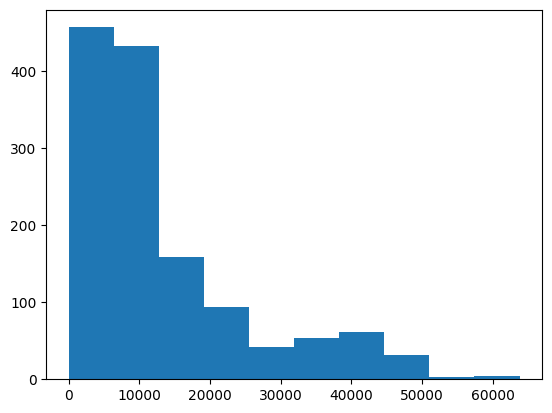

In [43]:
fig = plt.hist(df.charges)

Text(0, 0.5, 'bmi')

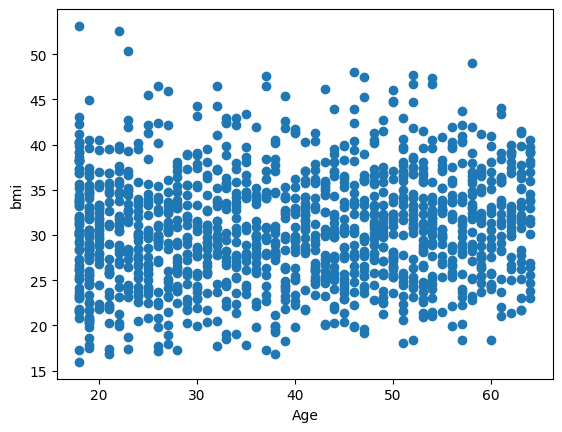

In [44]:
fig = plt.scatter(df.age, df.bmi)
plt.xlabel('Age')
plt.ylabel('bmi')

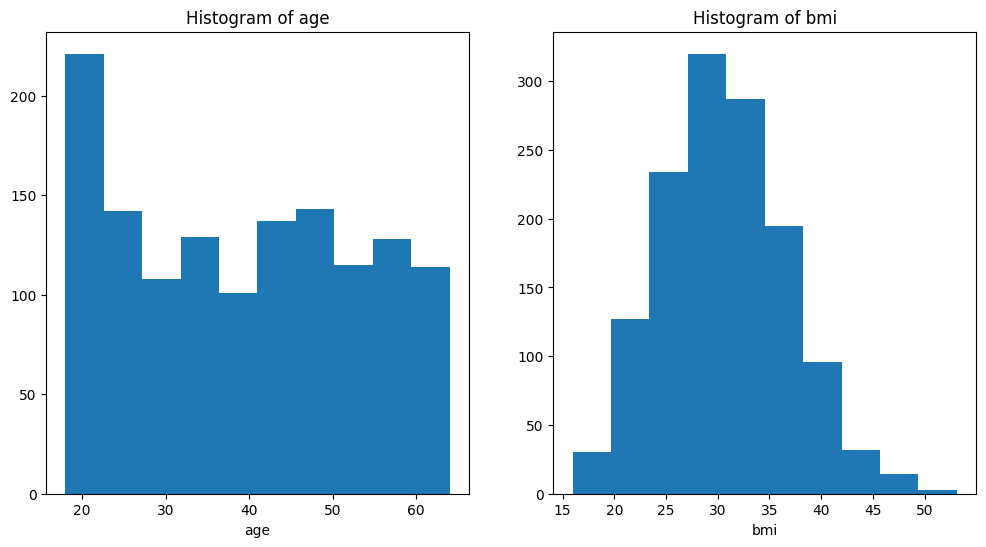

In [45]:
fig = plt.figure(figsize=(12, 6))
age = fig.add_subplot(121)
region = fig.add_subplot(122)

age.hist(df.age, bins=10)
age.set_xlabel('age')
age.set_title("Histogram of age")

region.hist(df.bmi, bins=10)
region.set_xlabel('bmi')
region.set_title("Histogram of bmi")

plt.show()

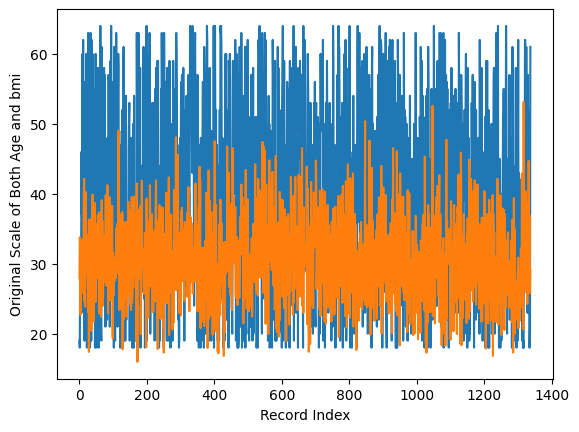

In [46]:
plt.plot(df.age)
plt.plot(df.bmi)
plt.xlabel('Record Index')
plt.ylabel('Original Scale of Both Age and bmi')
plt.show()

# 3 algo of scaling

## RobustScaler

In [47]:
Robust_scaler = RobustScaler()
Robust_scaled_data = Robust_scaler.fit_transform(df[['age',"bmi"]])
dfrs = pd.DataFrame(Robust_scaled_data, columns = ['age',"bmi"])
dfrs

,age,bmi
0,-0.808081,-0.297708
1,-0.848485,0.401310
2,-0.444444,0.309616
3,-0.242424,-0.916344
4,-0.282828,-0.181006
...,...,...
1333,0.444444,0.067877
1334,-0.848485,0.181006
1335,-0.848485,0.768086
1336,-0.727273,-0.547782


In [48]:
print(dfrs['age'].min())
print(dfrs['age'].max())
print(dfrs['bmi'].min())
print(dfrs['bmi'].max())

-0.8484848484848485
1.0101010101010102
-1.7195593926763912
2.706757963679667


Text(0, 0.5, 'bmi')

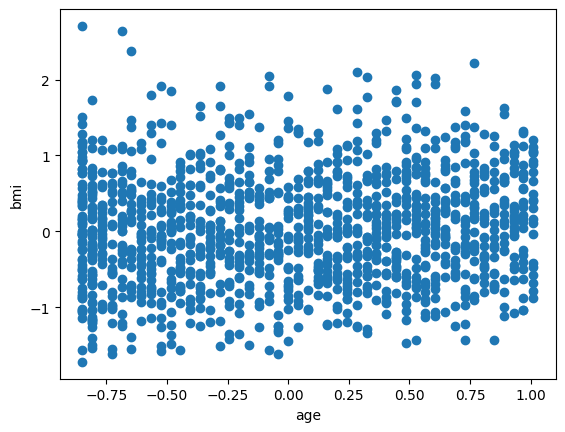

In [49]:
fig = plt.scatter(dfrs["age"],dfrs["bmi"])
plt.xlabel('age')
plt.ylabel('bmi')

Text(0, 0.5, 'RobustScaler Scale ')

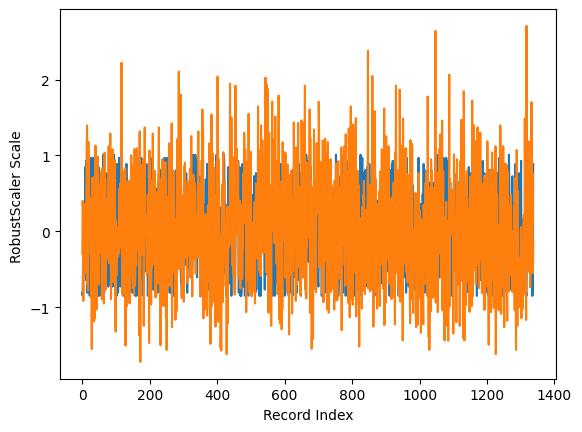

In [50]:
plt.plot(dfrs['age'])
plt.plot(dfrs['bmi'])
plt.xlabel('Record Index')
plt.ylabel('RobustScaler Scale ')

## MinMaxScaler

In [51]:
min_max_scaler = MinMaxScaler()
min_max_scaled_data = min_max_scaler.fit_transform(df[['age',"bmi"]])
dfmms = pd.DataFrame(min_max_scaled_data, columns = ['age',"bmi"])
dfmms


,age,bmi
0,0.021739,0.321227
1,0.000000,0.479150
2,0.217391,0.458434
3,0.326087,0.181464
4,0.304348,0.347592
...,...,...
1333,0.695652,0.403820
1334,0.000000,0.429379
1335,0.000000,0.562012
1336,0.065217,0.264730


In [52]:
print(dfmms['age'].max())
print(dfmms['age'].min())
print(dfmms['bmi'].min())
print(dfmms['bmi'].max())

1.0
0.0
0.0
1.0


Text(0, 0.5, 'bmi')

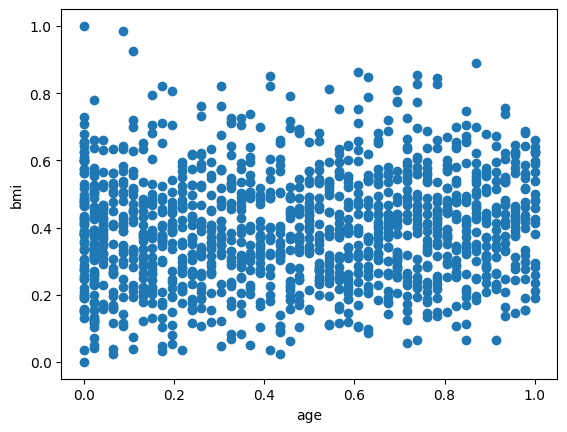

In [53]:
fig = plt.scatter(dfmms["age"],dfmms["bmi"])
plt.xlabel('age')
plt.ylabel('bmi')

Text(0, 0.5, 'RobustScaler Scale w/o outlier')

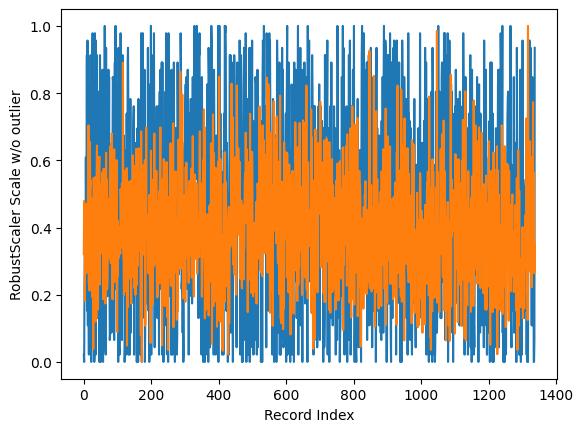

In [54]:
plt.plot(dfmms['age'])
plt.plot(dfmms['bmi'])
plt.xlabel('Record Index')
plt.ylabel('RobustScaler Scale w/o outlier')

## StandardScaler

In [55]:
Standar_scaler = StandardScaler()
Standar_scaler = Standar_scaler.fit_transform(df[['age',"bmi"]])
#b7walha l data frame 34an ay scaler btrg3ly values 
dfss = pd.DataFrame(Standar_scaler, columns = ['age',"bmi"])
dfss

,age,bmi
0,-1.438473,-0.453088
1,-1.509657,0.509881
2,-0.797815,0.383563
3,-0.441895,-1.305325
4,-0.513079,-0.292320
...,...,...
1333,0.768235,0.050543
1334,-1.509657,0.206390
1335,-1.509657,1.015153
1336,-1.296104,-0.797592


In [56]:
print(dfss['age'].max())
print(dfss['age'].min())
print(dfss['bmi'].max())
print(dfss['bmi'].min())


1.7648129124261547
-1.5096566743942048
3.685876765491111
-2.411837421905353


Text(0, 0.5, 'bmi')

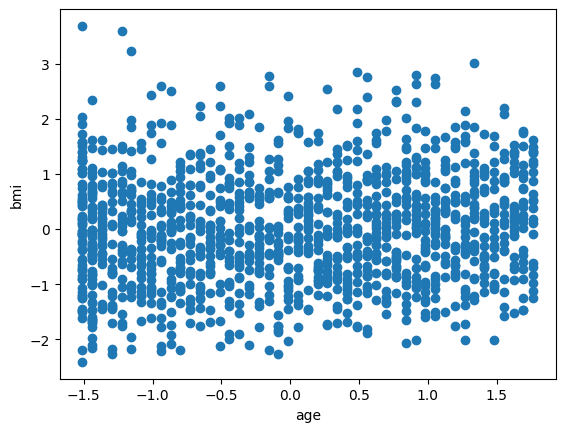

In [57]:
fig = plt.scatter(dfss["age"],dfss["bmi"])
plt.xlabel('age')
plt.ylabel('bmi')

Text(0, 0.5, 'RobustScaler Scale w/o outlier')

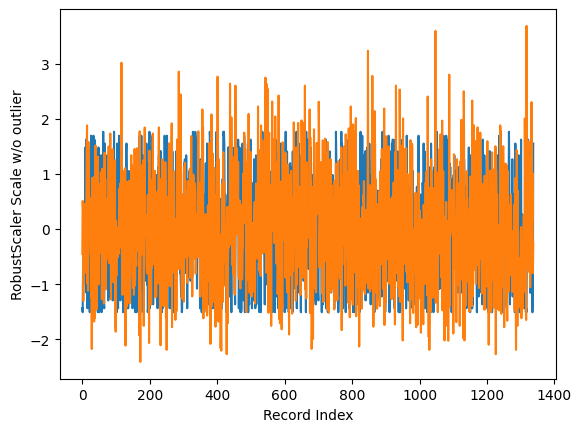

In [58]:
plt.plot(dfss['age'])
plt.plot(dfss['bmi'])
plt.xlabel('Record Index')
plt.ylabel('RobustScaler Scale w/o outlier')

# asgin tow columns to DF

In [59]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.9,0.0,1,3,16884.92400
1,18,1,33.77,1.0,0,2,1725.55230
2,28,1,33.0,3.0,0,2,4449.46200
3,33,1,22.705,0.0,0,1,21984.47061
4,32,1,28.88,0.0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.97,3.0,0,1,10600.54830
1334,18,0,31.92,0.0,0,0,2205.98080
1335,18,0,36.85,0.0,0,2,1629.83350
1336,21,0,25.8,0.0,0,3,2007.94500


In [60]:
df[['age' ,'bmi']] = dfss[['age' ,'bmi']]
# In most cases, when you want to select 'multiple columns', you should use the double square bracket notation (spf[['age', 'bmi']]). 
#The single square bracket notation with a comma inside is typically used for selecting a 'single column '
df

,age,sex,bmi,children,smoker,region,charges
0,-1.438473,0,-0.453088,0.0,1,3,16884.92400
1,-1.509657,1,0.509881,1.0,0,2,1725.55230
2,-0.797815,1,0.383563,3.0,0,2,4449.46200
3,-0.441895,1,-1.305325,0.0,0,1,21984.47061
4,-0.513079,1,-0.292320,0.0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,0.768235,1,0.050543,3.0,0,1,10600.54830
1334,-1.509657,0,0.206390,0.0,0,0,2205.98080
1335,-1.509657,0,1.015153,0.0,0,2,1629.83350
1336,-1.296104,0,-0.797592,0.0,0,3,2007.94500


# Spliting the dataset to X features and y target:

In [61]:
# X is all columns except the target charges
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print( x , y)

[[-1.4384725529415883 0 -0.4530882317650851 0.0 1 3]
 [-1.5096566743942048 1 0.5098814287142603 1.0 0 2]
 [-0.7978154598680397 1 0.3835634323651805 3.0 0 2]
 ...
 [-1.5096566743942048 0 1.0151534141105771 0.0 0 2]
 [-1.2961043100363554 0 -0.7975918581716647 0.0 0 3]
 [1.551260548068305 0 -0.2611504970528475 0.0 1 1]] [16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [62]:
# other way
x = df.drop(columns='charges')
y = df['charges']
print( x , y)

           age  sex       bmi children  smoker  region
0    -1.438473    0 -0.453088      0.0       1       3
1    -1.509657    1  0.509881      1.0       0       2
2    -0.797815    1  0.383563      3.0       0       2
3    -0.441895    1 -1.305325      0.0       0       1
4    -0.513079    1 -0.292320      0.0       0       1
...        ...  ...       ...      ...     ...     ...
1333  0.768235    1  0.050543      3.0       0       1
1334 -1.509657    0  0.206390      0.0       0       0
1335 -1.509657    0  1.015153      0.0       0       2
1336 -1.296104    0 -0.797592      0.0       0       3
1337  1.551261    0 -0.261150      0.0       1       1

[1338 rows x 6 columns] 0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# - test_size: The proportion of the dataset to include in the test split (e.g., 0.2 for 20% test)
# - random_state: An optional random seed for reproducibility


# resample if there is a column imbalanced

In [64]:
df['charges'].value_counts()
# so is balanced

charges
13226.516482    3
1639.563100     2
16884.924000    1
7243.813600     1
2221.564450     1
               ..
11454.021500    1
12730.999600    1
7345.084000     1
26109.329050    1
29141.360300    1
Name: count, Length: 1335, dtype: int64

In [65]:
df['region'].value_counts()
# so is balanced

region
2    367
3    325
1    324
0    322
Name: count, dtype: int64

<Axes: title={'center': 'count (target)'}, xlabel='region'>

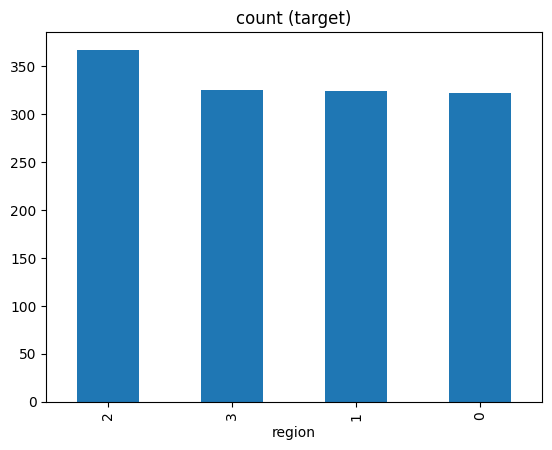

In [66]:
df['region'].value_counts().plot(kind='bar', title='count (target)')

In [67]:
ch = df['children'].value_counts()
ch

children
0.0    573
1.0    326
2.0    240
3.0    156
4.0     25
5.0     18
Name: count, dtype: int64

<Axes: title={'center': 'count (target)'}, xlabel='children'>

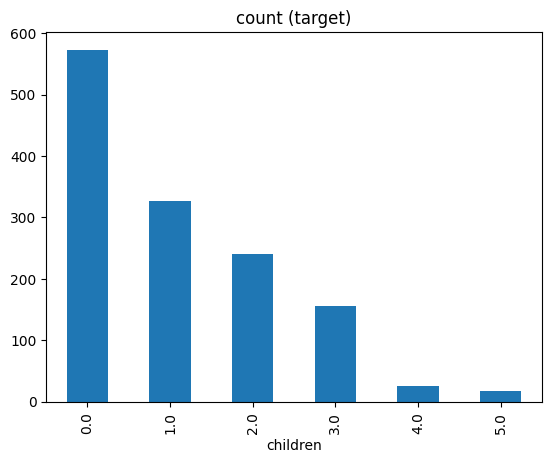

In [68]:
ch.plot(kind='bar', title='count (target)')
# so is imbalanced

<Axes: title={'center': 'count (target)'}, xlabel='children'>

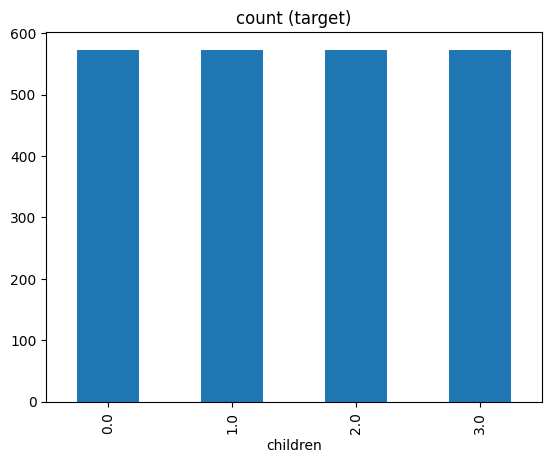

In [69]:
# Dataset oversampling 
count_class_zero, count_class_one, count_class_2 , count_class_3 , count_class_4 , count_class_5= df.children.value_counts()

#bgeeb kol columns ely index 0 ,1 , 2 , 3 ,4 ,5
df_class_one = df[df['children'] == 1]
df_class_zero = df[df['children'] == 0]
df_class_2 = df[df['children'] == 2]
df_class_3 = df[df['children'] == 3]


from sklearn.utils import resample 
df_class_one_upsampled = resample(df_class_one, replace = True, n_samples = count_class_zero, random_state = 42)
df_class_2_upsampled = resample(df_class_2, replace = True, n_samples = count_class_zero, random_state = 42)
df_class_3_upsampled = resample(df_class_3, replace = True, n_samples = count_class_zero, random_state = 42)


df_upsampled = pd.concat([ df_class_zero ,df_class_one_upsampled,df_class_2_upsampled,df_class_3_upsampled])
df_upsampled.children.value_counts().plot(kind='bar', title='count (target)')

In [70]:
df

,age,sex,bmi,children,smoker,region,charges
0,-1.438473,0,-0.453088,0.0,1,3,16884.92400
1,-1.509657,1,0.509881,1.0,0,2,1725.55230
2,-0.797815,1,0.383563,3.0,0,2,4449.46200
3,-0.441895,1,-1.305325,0.0,0,1,21984.47061
4,-0.513079,1,-0.292320,0.0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,0.768235,1,0.050543,3.0,0,1,10600.54830
1334,-1.509657,0,0.206390,0.0,0,0,2205.98080
1335,-1.509657,0,1.015153,0.0,0,2,1629.83350
1336,-1.296104,0,-0.797592,0.0,0,3,2007.94500


In [71]:
df_upsampled

,age,sex,bmi,children,smoker,region,charges
0,-1.438473,0,-0.453088,0.0,1,3,16884.92400
3,-0.441895,1,-1.305325,0.0,0,1,21984.47061
4,-0.513079,1,-0.292320,0.0,0,1,3866.85520
5,-0.584263,0,-0.807435,0.0,0,2,3756.62160
9,1.480076,0,-0.791030,0.0,0,1,28923.13692
...,...,...,...,...,...,...,...
2,-0.797815,1,0.383563,3.0,0,2,4449.46200
996,-0.014790,0,0.564018,3.0,0,3,7418.52200
435,1.480076,1,0.401609,3.0,0,2,13919.82290
998,-0.441895,0,0.923286,3.0,0,0,6551.75010


# LinearRegression

In [72]:
lr = LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [73]:
y_pred=lr.predict(x_test)

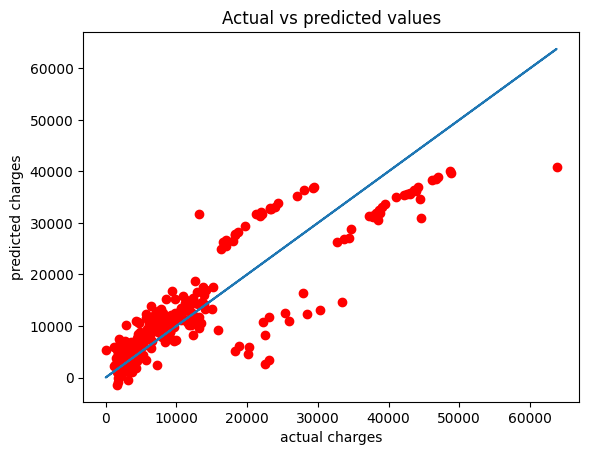

In [74]:
plt.scatter(y_test,y_pred , c='r')
plt.plot(y_test,y_test )
plt.xlabel('actual charges')
plt.ylabel('predicted charges')
plt.title('Actual vs predicted values')
plt.show()

In [75]:
print(lr.score(x_test, y_test))

0.7691803287766209


In [76]:
print(r2_score(y_test, y_pred))

0.7691803287766209


In [77]:
mean_absolute_error(y_test,y_pred)

4272.496113863412

In [78]:
print(np.sqrt(mean_squared_error(y_test, y_pred)) )

5943.897548526363


# DecisionTreeRegressor

In [79]:
model=DecisionTreeRegressor(max_depth=5)
model.fit(x_train, y_train)


DecisionTreeRegressor(max_depth=5)

In [80]:
y_pred = model.predict(x_test)
print(r2_score(y_pred, y_test))

0.8250883119302526


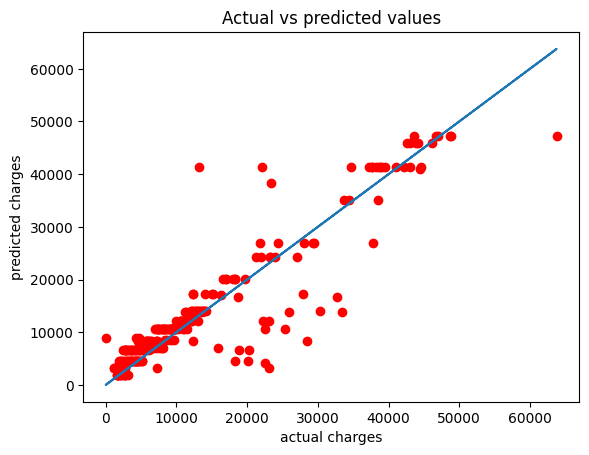

In [81]:
plt.scatter(y_test,y_pred , c='r')
plt.plot(y_test,y_test)
plt.xlabel('actual charges')
plt.ylabel('predicted charges')
plt.title('Actual vs predicted values')
plt.show()

In [82]:
mean_absolute_error(y_test,y_pred)

2859.0557816771843

In [83]:
print(np.sqrt(mean_squared_error(y_test, y_pred)) )

4983.621714636055
